In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

In [2]:
"""
    Function to load the image, convert it to a numpy array and normalize it to the range [0, 1]
"""
def load_gray_image(filename, size=(512, 512)):
    img = Image.open(filename)
    img = img.resize(size, resample=Image.BILINEAR)
    img = img.convert("L")
    # Bilinear resampling calculates the color of each pixel in the resized image by averaging the colors of the surrounding pixels in the original image.
    img = np.array(img)
    return img

In [7]:
"""
    Function to display the image from the numpy array
"""
def display_image(img, cmap=''):
    plt.imshow(img, cmap=cmap)
    plt.show()

In [4]:
img = load_gray_image('./images/person.jpg')

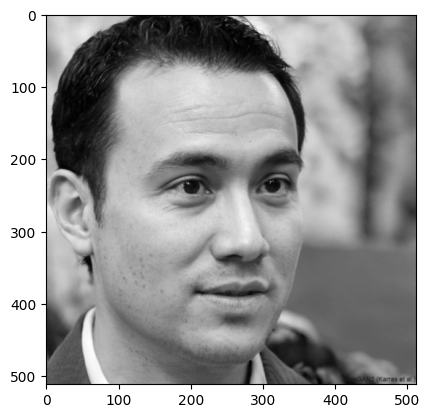

In [8]:
display_image(img, cmap="gray")

In [10]:
"""
    Function to compress the image using PCA
"""
def pca_compression(channel, n_components):
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(channel)
    inverted = pca.inverse_transform(transformed)
    return inverted

In [15]:
pca_img = pca_compression(img, 512)

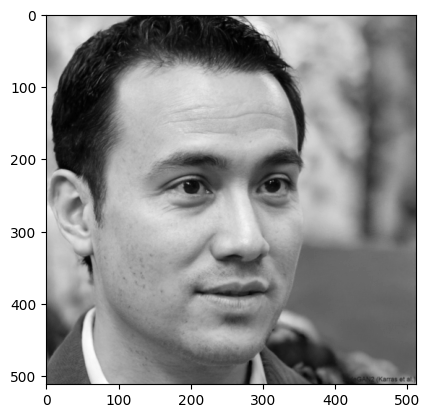

In [16]:
display_image(pca_img, cmap="gray")

In [33]:
def gram_schmidt(vectors):
    """
    Performs Gram-Schmidt orthogonalization on a set of vectors.
    
    Args:
        vectors (list): A list of numpy arrays representing the vectors.
        
    Returns:
        numpy.ndarray: An array of orthonormal vectors.
    """
    basis = np.zeros((len(vectors), len(vectors[0])))
    for i, v in enumerate(vectors):
        w = v
        for j in range(i):
            u = basis[j]
            projection = np.dot(w, u) / np.dot(u, u) * u
            w = w - projection
        if np.linalg.norm(w) > 1e-10:
            w = w / np.linalg.norm(w)
            basis[i] = w
    return basis

In [62]:
""" 
    Function to compress the image using Gram-Schmidt Orthogonalization
"""
def gs_compression(channel, n_components):
    basis = gram_schmidt(channel)[:, :n_components]
    coeff = np.dot(basis.T, channel)
    compressed = np.dot(basis, coeff)
    return compressed

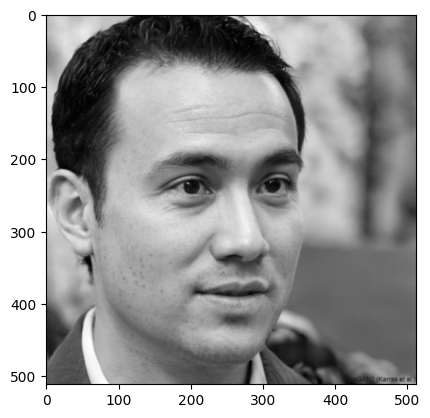

In [63]:
gs_compressed_img = gs_compression(img, 512)
display_image(gs_compressed_img, cmap="gray")

In [94]:
""" 
    Function to compress the image using Discrete Fourier Transform
"""
def dft_compression(img, n_components):
    dft_matrix = np.fft.fft2(img)
    print(dft_matrix.shape)
    mask = np.zeros_like(dft_matrix)
    mask[:, :n_components] = 1
    compressed_matrix = dft_matrix * mask
    compressed_img = np.fft.ifft2(compressed_matrix).real
    return compressed_img


(512, 512)


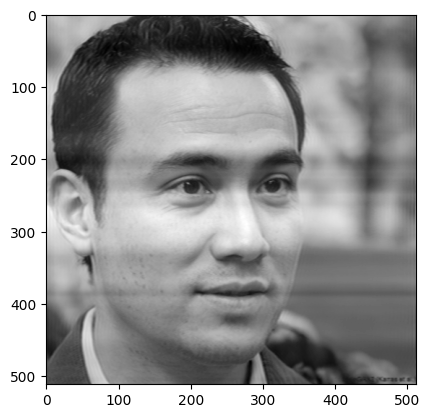

In [97]:
dft_img = dft_compression(img, 100)
display_image(dft_img, cmap="gray")